# Project<br/>Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#wrangling-general">General Properties</a></li>
        <li><a href="#wrangling-cleaning">Data Cleaning</a></li>
    </ul>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#eda-q1">Research Question 1</a></li>
        <li><a href="#eda-q2">Research Question 2</a></li>
        <li><a href='#eda-add'>Additional insights</a></li>
        <ul>
            <li><a href='#eda-add-moviesuccess'>Most and least successful movie</a></li>
            <li><a href='#eda-add-expensivemoviesbetter'>Are more expensive movies better?</a></li>
            <li><a href='#eda-add-highestratedgenres'>What are the highest rated genres?</a></li>
            <li><a href='#eda-add-budgetrevenuetime'>How do budget and revenue develop over time?</a></li>
        </ul>
    </ul>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'/>
## Introduction
The dataset to investigate contains ~10k movies collected from <a href="https://www.themoviedb.org/">The Movie Database (TMDb)</a>, provided by <a href="https://www.kaggle.com/tmdb/tmdb-movie-metadata">Kaggle</a>, including user ratings and revenue.

Next to the proposed questions (which movie genres are the most popular per year and what kinds of properties are associated with movies with a high revenue) we will dive a little more into the dataset to get a concise overview of it. We will have a look at the most and least successful movie as well as the question if movies with high budgets are better than low budget movies. We'll have a look at the highest rated genres and how the budgets and revenues of movies develop over time.

In [1]:
# First, let's import all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# And don't forget the magic word...
% matplotlib inline

So, let's load the data into a dataframe and have a first look at what the dataset looks like.

<a id='wrangling'/>
## Data Wrangling
<a id='wrangling-general'/>
### General Properties

In [2]:
# Load the data
df = pd.read_csv('data\\tmdb-movies.csv')

In [3]:
# show the first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


So, let's explore the columns and see what data they contain:

<table align="left">
  <tr>
    <th>Column</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>id</td>
    <td>The unique id for this movie at <a href="https://www.themoviedb.org/">TMDb</a>.</td>
  </tr>
  <tr>
    <td>imdb_id</td>
    <td>The unique id for this movie at <a href="https://www.imdb.com">IMDb</a>.</td>
  </tr>
  <tr>
    <td>popularity</td>
    <td>According to the <a href="https://developers.themoviedb.org/3/getting-started/popularity">API Docs</a> this is a metric containing different stats about the movie.</td>
  </tr>
  <tr>
    <td>budget</td>
    <td>Budget in USD.</td>
  </tr>
  <tr>
    <td>revenue</td>
    <td>Revenue in USD.</td>
  </tr>
  <tr>
    <td>original_title</td>
    <td>Original title of the movie.</td>
  </tr>
  <tr>
    <td>cast</td>
    <td>Pipe separated list of actors playing a role in the movie.</td>
  </tr>
  <tr>
    <td>homepage</td>
    <td>The homepage of the movie.</td>
  </tr>
  <tr>
    <td>director</td>
    <td>The director of the movie.</td>
  </tr>
  <tr>
    <td>tagline</td>
    <td>A short summary of the movie.</td>
  </tr>
  <tr>
    <td>keywords</td>
    <td>Pipe separated list of keywords.</td>
  </tr>
  <tr>
    <td>overview</td>
    <td>An overview of the movie.</td>
  </tr>
  <tr>
    <td>runtime</td>
    <td>The rumtime of the movie in minutes.</td>
  </tr>
  <tr>
    <td>genres</td>
    <td>Pipe separated list of genres.</td>
  </tr>
  <tr>
    <td>production_companies</td>
    <td>Pipe separated list of production companies.</td>
  </tr>
  <tr>
    <td>release_date</td>
    <td>Release date of the movie.</td>
  </tr>
  <tr>
    <td>vote_count</td>
    <td>The count of votes for the movie at <a href="https://www.themoviedb.org/">TMDb</a>.</td>
  </tr>
  <tr>
    <td>vote_average</td>
    <td>The vote average for the movie at <a href="https://www.themoviedb.org/">TMDb</a>. This is a value between 0 and 10.</td>
  </tr>
  <tr>
    <td>release_year</td>
    <td>The year the movie was released.</td>
  </tr>
  <tr>
    <td>budget_adj</td>
    <td>Adjusted budget to 2010 dollars, accounting for inflation over time.</td>
  </tr>
  <tr>
    <td>revenue_adj</td>
    <td>Adjusted revenue to 2010 dollars, accounting for inflation over time.</td>
  </tr>
</table>

In [4]:
# show the rows and columns of the dataframe
df.shape

(10866, 21)

In [5]:
# show info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

It looks like there a quite a few null values in the dataset. We won't do anything yet, but we need to keep them in mind!

Lastly, let's see, if there are duplicated values in the dataset.

In [6]:
# show the amount of duplicated rows
sum(df.duplicated())

1

To sum up, these are the problems we have with the data:
- Some columns are a pipe separated list
- There are null values in the dataset
- There are duplicates

<a id='wrangling-cleaning'/>
### Data Cleaning

The first step of the cleaning is removing all the (for our purpose) unnceccessary columns. The columns to drop are:
- `imdb_id`, `homepage`, `tagline`, and `overview` because they only contain strings that we don't want to analyse currently
- `popularity` because it is an somehow aggregated value with no defined min or max
- `budget_adj` and `revenue_adj` because here we'll use the unadjusted values

In [7]:
# drop columns
columns_to_drop = ['imdb_id', 'popularity', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
df.drop(columns=columns_to_drop, inplace=True)

Now, let's remove the duplicates.

In [8]:
# remove duplicates
df.drop_duplicates(inplace=True)

Convert the date column into a datetime format so we can better work with it and get the month later.

In [9]:
# convert release_date column to datatime
df['release_date'] = pd.to_datetime(df['release_date'])

Create cells `profit` and `release_month` for later use to see if we can find dependencies.

In [10]:
# create new columns that are needed for later research
df['profit'] = df['revenue'] - df['budget']

In [11]:
# release month
df['release_month'] = df['release_date'].dt.month

We could have removed all entries with incomplete data (e.g. where budget or revenue is missing), but instead I will keep these entries and handle them when we have a deeper look at the corresponding columns.
I choose this procedure to prevent unintended falsification of data because maybe mostly documentaries have no revenue given in the data and filtering would thus underrepresent them.

In [12]:
# show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                      10865 non-null int64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
profit                  10865 non-null int64
release_month           10865 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(8), object(6)
memory usage: 1.4+ MB


<a id='eda'/>
## Exploratory Data Analysis
Before we dive into the research questions, let's have a quick look at the data.

In [13]:
# show a brief description of the dataframe
df.describe()

,id,budget,revenue,runtime,vote_count,vote_average,release_year,profit,release_month
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,10865.000000
mean,66066.374413,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,2.520261e+07,6.827612
std,92134.091971,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,9.659103e+07,3.441764
min,5.000000,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,-4.139124e+08,1.000000
25%,10596.000000,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,4.000000
50%,20662.000000,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,7.000000
75%,75612.000000,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,9.092453e+06,10.000000
max,417859.000000,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,2.544506e+09,12.000000


Obviously, we don't have to examine all the values here, and some of them don't even make sense. For example, we don't care about the mean of the id, because, although it is an integer, it is a - at least for us - randomly assigned value to a movie.

So, now let's have a look at some of the columns.

#### budget
The mean budget is 1.462429e+07 with a standard deviation of 3.091428e+07, which is quite big. We can see that the minimum as well as the first and second quartile are 0 which shows that there must be many 0 values in the budget column. The maximum budget for a movie in this dataset is 4.250000e+08. That is 425 million dollars!
Since 0 is the default value for integers and floats, it is very likely that the TMDb API sets missing budget values to 0. This explains why many movies seem to have a budget of 0.

#### revenue
The mean revenue is 3.982690e+07 with a standard deviation of 1.170083e+08, which, again, is quite big compared to the mean. This indicates very distributed values in the dataset. Again, the minimum as well as the first and second quartile are 0, indicating many 0 in the revenue column. The maximum revenue is 2.781506e+09, that's almost 3 billion dollars. Again, 0 is probably used for missing values, explaining the high amount of 0 values in the revenue column.

#### runtime
The mean runtime is ~102 minutes with a standard deviation of ~32 minutes. This is also very well represented in the three quartiles. The minimum value is 0 and the maximum value is 900, which is 15 hours! The minimum value of 0 must be a missing value since no movie can have a length of 0 minutes.

#### profit
The profit column is a calculated column, subtracting the budget from the revenue of the movie. This means, if the budget is bigger than the revenue, the profit can be negative. That's the reason that the minimum profit is -4.139124e+08. The mean is ~2.5 million with a standard deviation of 9.7 million.

#### release_month
The release month is the extracted month value from the `release_year` column. The mean in a normal distribution for the months should be 6.5. The mean here is 6.8, indicating that the movies tend to be released a little later in the year. Not surprisingly, the minimum is 1 (January) and the maximum is 12 (December).

<a id='eda-q1'/>
### Research Question 1:<br/>Which genres are most popular from year to year?

To answer this question we need a list of each year with the corresponding genre that is the most popular for this year. For simplicity's sake we consider 'most popular' to be 'most often used', meaning we're looking for the highest count of a genre per year.

The second obstacle to overcome is the pipe separated list in the ``genres`` column of the dataset.

So, what we need to do is: First, create a new dataframe with a separated genres column and second, group the entries by year and genre and find the highest count per year.

For the first part, I'm defining a function that returns a dataframe with the separated values for the given column.

In [14]:
# Parts of this function are taken from
# https://stackoverflow.com/a/33623135

def expand_df_columns(df_to_expand, columns_to_expand, sep='|'):
    for c in columns_to_expand:
        df_to_expand = expand_column(df_to_expand, c, sep)
    
    return df_to_expand

def expand_column(df_to_expand, column, sep='|'):
    s = df_to_expand[column].str.split('|', expand=True).stack()
    i = s.index.get_level_values(0)
    df2 = df_to_expand.loc[i].copy()
    df2[column] = s.values
    return df2.reset_index(drop=True)

So, let's see what happens when we expand the ``genres`` column in our dataframe.

In [15]:
# expand the genres column
df_genres = expand_df_columns(df, ['genres'])

# show the first few rows of the new dataframe
df_genres.head()

,id,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,release_month
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810,6
1,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810,6
2,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810,6
3,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810,6
4,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354,5


We now have multiplied each row by the number of genres for that row. This means, our dataframe is now much larger than before. Therefore, we now have a nice ``genres`` column that we can use to find our desired answer.

Therefore, first group the entries by ``release_year`` and ``genres``, find the corresponding count for each group, sort them by ``release_year`` and count.

In [16]:
# group dataframe by release_year and genres, count the occurences of each group and put them as a column into the dataframe
df_genres_year = df_genres.groupby(['release_year', 'genres']).size().to_frame('count').sort_values(by=['release_year', 'count'], ascending=False).reset_index()

# show the first 10 entries of the new dataframe
df_genres_year.head(10)

,release_year,genres,count
0,2015,Drama,260
1,2015,Thriller,171
2,2015,Comedy,162
3,2015,Horror,125
4,2015,Action,107
5,2015,Science Fiction,86
6,2015,Adventure,69
7,2015,Documentary,57
8,2015,Romance,57
9,2015,Crime,51


Uh oh! We only need the highest count per year, so we need to get rid of all the other ones. Luckily the pandas documentation for <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html">pandas.DataFrame.drop_duplicates</a> states that we can use the function with a specified subset. So when we use the ``drop_duplicates`` function with a subset of just the ``release_year``, we can remove all the entries for a year but one. We can also use ``inplace=True`` to do it, well, inplace.

In [17]:
# remove duplicate release_year entries
df_genres_year.drop_duplicates('release_year', inplace=True)

So, let's hava a look at the most popular genre per year!

In [18]:
# show the dataframe
df_genres_year

,release_year,genres,count
0,2015,Drama,260
19,2014,Drama,284
38,2013,Drama,253
57,2012,Drama,232
77,2011,Drama,214
97,2010,Drama,210
117,2009,Drama,224
136,2008,Drama,233
156,2007,Drama,197
176,2006,Drama,197


It looks like Drama and Comedy were, are, and probably will be very popular. Nonetheless, since 2004 the Drama genre is the most popular.

<a id='eda-q2'/>
### Research Question 2:<br/>What kinds of properties are associated with movies that have high revenues?

The second rearch question is a kind of broader one. I think there is no definite answer for this question, but let's dive into the data and see what we can find out about it.

First of all, what counts as having a "high revenue" for a movie? A revenue over a million dollars? Over 5 million? Over 50? Here, I'd like to use another approach. We cut the dataset in four pieces, with the edges being the quantiles at 25%, 50%, 75%, and min/max. To do this we create a list containing the edges: 

In [19]:
# Create edges
bin_edges = [df[df['revenue'] > 0].min()['revenue'],
             df[df['revenue'] > 0].quantile(.25)['revenue'],
             df[df['revenue'] > 0].quantile(.5)['revenue'],
             df[df['revenue'] > 0].quantile(.75)['revenue'],
             df[df['revenue'] > 0].max()['revenue']]

# Show the edges
bin_edges

[2, 7732325.0, 31853080.0, 99965753.0, 2781505847]

Note that for the edge finding I only use rows with a revenue greater than 0. Otherwise the numbers would be lower due to missing data (missing data is very likely either a ``0`` or a ``NaN``). Also note that these are the same values we would get by using the ``describe()`` function for the ``revenue`` column.

In [20]:
# description of dataframe where revenue > 0
df[df['revenue'] > 0]['revenue'].describe()

count    4.849000e+03
mean     8.923886e+07
std      1.620801e+08
min      2.000000e+00
25%      7.732325e+06
50%      3.185308e+07
75%      9.996575e+07
max      2.781506e+09
Name: revenue, dtype: float64

Name the bins 'Low', 'Medium', 'High', and 'Very High' and create a new column in the dataset called ``revenue_label``.

In [21]:
# Define list for bin names
bin_names = ['Low', 'Medium', 'High', 'Very High']

# Cut the dataframe at the given edges, name them accordingly
# and create a new column with them
df['revenue_label'] = pd.cut(df['revenue'], bin_edges, labels=bin_names)

Let's have a quick look at the dataframe with the new column.

In [22]:
df.head()

,id,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,release_month,revenue_label
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810,6,Very High
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354,5,Very High
2,262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201,3,Very High
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225,12,Very High
4,168259,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360,4,Very High


So, having the labels in the dataframe, we can have a first quick look at the data, grouped by the revenue label.

In [23]:
# show the means of each revenue_label group
df.groupby(['revenue_label']).mean()

,id,budget,revenue,runtime,vote_count,vote_average,release_year,profit,release_month
revenue_label,,,,,,,,,
Low,69936.257638,5.384152e+06,2.316227e+06,101.625103,86.174236,6.025434,2003.213873,-3.067925e+06,6.706028
Medium,34414.280528,1.550480e+07,1.819784e+07,106.062706,148.467822,6.028960,1997.352310,2.693037e+06,6.814356
High,36493.334983,2.703994e+07,5.859159e+07,108.892739,331.095710,6.166502,2000.067657,3.155166e+07,6.933168
Very High,37539.514026,7.036850e+07,2.779253e+08,115.309406,1179.622112,6.374257,2003.050330,2.075568e+08,7.374587


As expected, the mean revenue increases with the higher labels. This is an expected result because this was the grouping criteria in the first place. Nevertheless, this is a good sign that the grouping is correct.

The budget increases with the revenue labels as well as the runtime, the vote count, vote average and the profit. This is nice to know but for answering the question we only need to have a look at the data that can be collected before a movie is aired. This means the budget and the run time are factors for high revenue movies. It also looks like movies with high rvenues are released later in the year than other movies.

Now, let's see if we can find out if there are any other indicators for a good movie.

### How about actors...?

In [24]:
# expand cast of the dataframe
df_actors = expand_df_columns(df, ['cast'])

# group it by cast and revenue_label and get the corresponding counts
df_actors_revenue = df_actors.groupby(['cast', 'revenue_label']).size().to_frame('count').sort_values(by=['revenue_label', 'count'], ascending=False).reset_index()
df_actors_revenue.head()

,cast,revenue_label,count
0,Tom Cruise,Very High,26
1,Brad Pitt,Very High,25
2,Tom Hanks,Very High,23
3,Sylvester Stallone,Very High,22
4,Bruce Willis,Very High,20


Looks like Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone and Bruce Willis appear in high revenue movies quite a lot. To clarify, let's check the revenue label distribution for Tom Cruise.

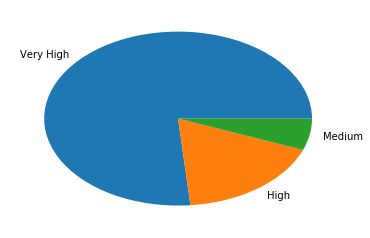

In [25]:
# create a dataframe with the needed values only
df_plot = df_actors_revenue[df_actors_revenue['cast'] == 'Tom Cruise'][['revenue_label', 'count']]

# plot the dataframe as a pie chart
plt.pie(df_plot['count'], labels=df_plot['revenue_label']);

Quite as expected. How about Bruce Willis...?

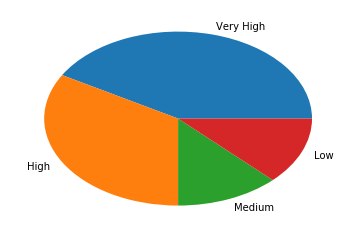

In [26]:
# create a dataframe with the needed values only
df_plot = df_actors_revenue[df_actors_revenue['cast'] == 'Bruce Willis'][['revenue_label', 'count']]

# plot the dataframe as a pie chart
plt.pie(df_plot['count'], labels=df_plot['revenue_label']);

Now that we have the actors covered...

### How about directors...?

In [27]:
# group it by director and revenue_label and get the corresponding counts
df_directors_revenue = df_actors.groupby(['director', 'revenue_label']).size().to_frame('count').sort_values(by=['revenue_label', 'count'], ascending=False).reset_index()
df_directors_revenue.head()

,director,revenue_label,count
0,Steven Spielberg,Very High,115
1,Robert Zemeckis,Very High,60
2,Clint Eastwood,Very High,55
3,Ridley Scott,Very High,55
4,Michael Bay,Very High,50


Wow, Steven Spielberg really knows how to make good movies! Has he ever done a bad one...?

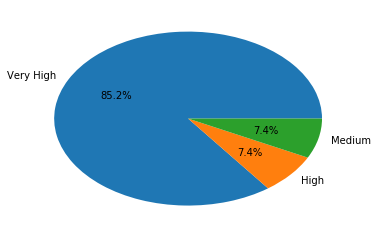

In [28]:
# create a dataframe with the needed values only
df_plot = df_directors_revenue[df_directors_revenue['director'] == 'Steven Spielberg'][['revenue_label', 'count']]

# plot the dataframe as a pie chart
plt.pie(df_plot['count'], labels=df_plot['revenue_label'], autopct='%1.1f%%');

That looks really impressing! He truly is a master director! So now we also know about the directors, but...

### How about production companies...?

Here, we have to expand the dataset again because the ``production_company`` column is a pipe separated list.

In [29]:
# expand cast of the dataframe
df_prod = expand_df_columns(df, ['production_companies'])

# group it by cast and revenue_label and get the corresponding counts
df_prod_revenue = df_prod.groupby(['production_companies', 'revenue_label']).size().to_frame('count').sort_values(by=['revenue_label', 'count'], ascending=False).reset_index()
df_prod_revenue.head()

,production_companies,revenue_label,count
0,Warner Bros.,Very High,157
1,Universal Pictures,Very High,151
2,Paramount Pictures,Very High,120
3,Twentieth Century Fox Film Corporation,Very High,106
4,Columbia Pictures,Very High,91


Warner Bros. and Universal Pictures produced many successful movies! And to finish the roundup...

### How about genres...?

In [30]:
# expand cast of the dataframe
df_genre = expand_df_columns(df, ['genres'])

# group it by cast and revenue_label and get the corresponding counts
df_genre_revenue = df_genre.groupby(['genres', 'revenue_label']).size().to_frame('count').sort_values(by=['revenue_label', 'count'], ascending=False).reset_index()
df_genre_revenue.head()

,genres,revenue_label,count
0,Action,Very High,451
1,Comedy,Very High,447
2,Drama,Very High,418
3,Adventure,Very High,389
4,Thriller,Very High,351


The best genres for high revenues are clearly Action, Comedy, and Drama.

**So what are the properties that can be associated with a movie with a high revenue?**

First, the movie needs to be directed by Steven Spielberg. It needs to be an action movie starring Tom Cruise and must be produced by Warner Bros. The movie should have a runtime of ~115min, a big budget, and optimally be released at the end of the year.

<a id='eda-add'/>
### Additional insights
<a id='eda-add-moviesuccess'/>
#### Most and least successful movie
Let's have a quick look at the most successful movie in our dataset:

In [31]:
# sort by profit and show first entry
df.sort_values(by='profit', ascending=False).iloc[0]

id                                                                  19995
budget                                                          237000000
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
keywords                culture clash|future|space war|space colony|so...
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                          2009-12-10 00:00:00
vote_count                                                           8458
vote_average                                                          7.1
release_year                          

The most successful movie in the dataset is "Avatar". How about the least successful movie?

In [32]:
# sort by profit and show last entry
df.sort_values(by='profit', ascending=False).iloc[-1]

id                                                                  46528
budget                                                          425000000
revenue                                                          11087569
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
keywords                assassin|small town|revenge|deception|super speed
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
vote_count                                                             74
vote_average                                                          6.4
release_year                          

The least successful movie is a movie called "The Warrior's Way". Actually, I have never heard of it...

<a id='eda-add-expensivemoviesbetter'/>
#### Are more expensive movies better?

To answer this question, let's cut the data in bins again, like we did with the revenue.

In [33]:
# define the bin edges as the mix, max and the quantiles for the budget
bin_edges = [df[df['budget'] > 0].min()['budget'],
             df[df['budget'] > 0].quantile(.25)['budget'],
             df[df['budget'] > 0].quantile(.5)['budget'],
             df[df['budget'] > 0].quantile(.75)['budget'],
             df[df['budget'] > 0].max()['budget']]
bin_edges

[1, 6000000.0, 17000000.0, 40000000.0, 425000000]

In [34]:
# name the bins
bin_names = ['Low', 'Medium', 'High', 'Very High']

In [35]:
# cut the data and create a new column
df['budget_label'] = pd.cut(df['budget'], bin_edges, labels=bin_names)

In [36]:
# let's have a quick look at the data
df.head()

,id,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,release_month,revenue_label,budget_label
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810,6,Very High,Very High
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354,5,Very High,Very High
2,262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201,3,Very High,Very High
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225,12,Very High,Very High
4,168259,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360,4,Very High,Very High


To answer the question let's compare the mean of ``vote_average`` for every budget level:

In [37]:
# show mean of vote_average of budget groups
df.groupby('budget_label').mean()['vote_average']

budget_label
Low          5.949889
Medium       6.017976
High         6.065580
Very High    6.104504
Name: vote_average, dtype: float64

We can clearly see here, that movies with a higher budget receive better user ratings.

<a id='eda-add-highestratedgenres'/>
#### What are the highest rated genres?

Let's see how the genres get voted on.

In [38]:
# expand the genres column
df_genres = expand_df_columns(df, ['genres'])

# group the dataframe by genre and get the mean vote_average, then sort
df_genres.groupby(['genres']).mean()['vote_average'].sort_values(ascending=False)

genres
Documentary        6.908462
Music              6.480392
History            6.410479
Animation          6.403147
War                6.297778
Drama              6.165546
Crime              6.124889
Western            6.083030
Romance            6.042874
Family             5.997563
Foreign            5.981383
Mystery            5.946790
Adventure          5.940585
Comedy             5.905167
Fantasy            5.863537
TV Movie           5.788024
Action             5.787752
Thriller           5.750671
Science Fiction    5.665582
Horror             5.337447
Name: vote_average, dtype: float64

It clearly looks like documentaries get a high vote average, closely followed by music, history, and animation movies.

<a id='eda-add-budgetrevenuetime'/>
#### How do budget and revenue develop over time?

Let's have a look at the development of budgets and revenues over time. Therefore, we take a subset of our dataset in which we remove the rows where budget and/or revenue is less than or equal to zero.

In [39]:
# create dataframe with budget and revenue > 0
df_budget_revenue = df[(df['budget'] > 0) & (df['revenue'] > 0)]

# adjust the dataframe for easier plotting
# --> only use columns we need for plotting
# --> group by release_year
# --> sum over the remaining columns
# --> reset index for easier plotting
df_budget_revenue = df_budget_revenue[['release_year', 'revenue', 'budget']].groupby(['release_year']).sum().reset_index()
df_budget_revenue.head()

,release_year,revenue,budget
0,1960,129005000,20806948
1,1961,337720188,38637000
2,1962,206329846,39450000
3,1963,176526882,61115000
4,1964,328613548,33935161


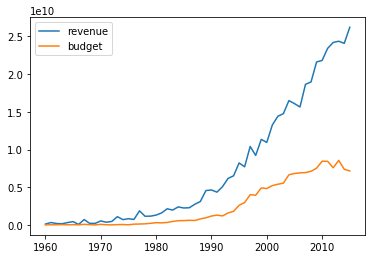

In [40]:
# plot the dataframe
plt.plot('release_year', 'revenue', data=df_budget_revenue)
plt.plot('release_year', 'budget', data=df_budget_revenue)
plt.legend();

In the 1960s the movie budgets were very small, as were the revenues. But starting at around 1990 the budgets increase. The revenues start to noticably increase by around 1980.

Nowadays movies have a much higher revenue than ever although the budgets tend to decrease slightly - or at least stagnate.

<a id='conclusions'/>
## Conclusions

This is a very interesting dataset, although it seems to have its weaknesses. The newest entries in this dataset are from 2015, but now, three years later, the values probably have changed. So this is something you have to consider when having a look at the votes or budgets and revenues of a movie.

So, to summarize our findings:
- The most popular genres over the years are drama and comedy, with drama being in the lead since 2004.
- A movie with a high revenue should star Tom Cruise, be directed by Steven Spielberg, be produced by Warner Bros and be an action movie. It should have a length of ~115 minutes, a big budget, and should be released later in the year.

As always, the analysis of a dataset can only be as good as the data. This means, if the data in the dataset is wrong, the analysis and the conclusions will probably be wrong.

The most critical point here is, in my opinion, the fact that it is very likely for an 'good' actor to only play in 'good' movies. This is the same as for all the other variables, like the director or the production company. Once they have reached a certain level of positive reception among the viewers the actors will be hired for movies with bigger budgets and the production companies pay them more because the viewers like movies starring these actors. It's very unlikely that a high value actor like, as we've seen here, Tom Cruise will star in a movie like 'The Warrior's Way', which was the worst movie in our dataset.

## Outlook
There are many more relationships that could be examined. A few research questions for this could be 'Do actors like to play in movies with a specific genre?', 'Do actors have a favorite director?', or 'Which genre is likely to have a high revenue?'